# Compare Machine Learning Algorithms: A Guide for Regression Task

## 1. Upload data from Local File System.

In [ ]:
from google.colab import files

uploaded = files.upload() 

Saving Energy_efficiency_DataSet.csv to Energy_efficiency_DataSet (2).csv


## 2. Take a peek at your raw data.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

names = ['RC', 'SA', 'WA', 'RA', 'OH', 'O', 'GA', 'GAD', 'HL', 'CL']
data = pd.read_csv('Energy_efficiency_DataSet.csv', names=names, comment='#')
peek = data.head(20)
print(peek)

      RC     SA     WA      RA   OH  O   GA  GAD     HL     CL
0   0.98  514.5  294.0  110.25  7.0  2  0.0    0  15.55  21.33
1   0.98  514.5  294.0  110.25  7.0  3  0.0    0  15.55  21.33
2   0.98  514.5  294.0  110.25  7.0  4  0.0    0  15.55  21.33
3   0.98  514.5  294.0  110.25  7.0  5  0.0    0  15.55  21.33
4   0.90  563.5  318.5  122.50  7.0  2  0.0    0  20.84  28.28
5   0.90  563.5  318.5  122.50  7.0  3  0.0    0  21.46  25.38
6   0.90  563.5  318.5  122.50  7.0  4  0.0    0  20.71  25.16
7   0.90  563.5  318.5  122.50  7.0  5  0.0    0  19.68  29.60
8   0.86  588.0  294.0  147.00  7.0  2  0.0    0  19.50  27.30
9   0.86  588.0  294.0  147.00  7.0  3  0.0    0  19.95  21.97
10  0.86  588.0  294.0  147.00  7.0  4  0.0    0  19.34  23.49
11  0.86  588.0  294.0  147.00  7.0  5  0.0    0  18.31  27.87
12  0.82  612.5  318.5  147.00  7.0  2  0.0    0  17.05  23.77
13  0.82  612.5  318.5  147.00  7.0  3  0.0    0  17.41  21.46
14  0.82  612.5  318.5  147.00  7.0  4  0.0    0  16.95

## 3. Retrieve `features` and `class`

In [ ]:
array = data.values
X = array[:,0:-2]
Y = array[:,-2]

In [ ]:
print(X)  # features

[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]


In [ ]:
print(Y) # class

[15.55 15.55 15.55 15.55 20.84 21.46 20.71 19.68 19.5  19.95 19.34 18.31
 17.05 17.41 16.95 15.98 28.52 29.9  29.63 28.75 24.77 23.93 24.77 23.93
  6.07  6.05  6.01  6.04  6.37  6.4   6.37  6.4   6.85  6.79  6.77  6.81
  7.18  7.1   7.1   7.1  10.85 10.54 10.77 10.56  8.6   8.49  8.45  8.5
 24.58 24.63 24.63 24.59 29.03 29.87 29.14 28.09 26.28 26.91 26.37 25.27
 23.53 24.03 23.54 22.58 35.56 37.12 36.9  35.94 32.96 32.12 32.94 32.21
 10.36 10.43 10.36 10.39 10.71 10.8  10.7  10.75 11.11 11.13 11.09 11.16
 11.68 11.69 11.7  11.69 15.41 15.2  15.42 15.21 12.96 12.97 12.93 13.02
 24.29 24.31 24.13 24.25 28.88 29.68 28.83 27.9  26.48 27.02 26.33 25.36
 23.75 24.23 23.67 22.79 35.65 37.26 36.97 36.03 33.16 32.4  33.12 32.41
 10.42 10.46 10.32 10.45 10.64 10.72 10.55 10.68 11.45 11.46 11.32 11.49
 11.45 11.42 11.33 11.43 15.41 15.18 15.34 15.19 12.88 13.   12.97 13.04
 24.28 24.4  24.11 24.35 28.07 29.01 29.62 29.05 25.41 26.47 26.89 26.46
 22.93 23.84 24.17 23.87 35.78 35.48 36.97 36.7  32.

## 4. Prepare `models`

In [ ]:
# container for all models
models = []

### 4.1. Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
models.append(('LR', lr))

### 4.2. Support Vector Machines

In [ ]:
from sklearn.svm import SVR

svm = SVR()
models.append(('SVM', svm))

### 4.3. Artificial Neural Network - Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
models.append(('MLP', ann))

### 4.4. Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor

# create containers of all sub models
estimators = []

# Linear Regression
model0 = LinearRegression()
estimators.append(('lr', model0))

# Support Vector Machine
model2 = SVR()
estimators.append(('svm', model2))

# Artificial Neural Network - Multilayer Perceptron
model3 = MLPRegressor()
estimators.append(('ann', model3))

# Create the ENSEMBLE model
vot = VotingRegressor(estimators)
models.append(('VOT', vot))

### 4.5. Bagging Ensembles

#### 4.5.1. Linear Regression as base estimator

In [ ]:
from sklearn.ensemble import BaggingRegressor

baglr = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10)
models.append(('BAGLR', baglr))

#### 4.5.2. Support Vector Machine as base estimator

In [ ]:
bagsvm = BaggingRegressor(base_estimator=SVR(), n_estimators=10)
models.append(('BAGSVM', bagsvm))

#### 4.5.3. Artificial Neural Network as base estimator

In [ ]:
bagann = BaggingRegressor(base_estimator=MLPRegressor(), n_estimators=10)
models.append(('BAGMLP', bagann))

### 4.6. Boosting Ensembles

#### 4.6.1. Linear Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adalr = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10)
models.append(('ADALR', adalr))

#### 4.6.2. Support Vector Machines as base estimator

In [ ]:
adasvm = AdaBoostRegressor(base_estimator=SVR(), n_estimators=10)
models.append(('ADASVM', adasvm))

#### 4.6.3. Artificial Neural Network as base estimator

In [ ]:
# not applicable

## 5. `Train` and `Cross-valiidate`

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


results = []
names = []
msgs = []
scoring = 'neg_mean_squared_error'

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 6. `Boxplot` Algorithm Comparison

In [ ]:
for msg in msgs:
  print(msg)

LR:	 -9.805132 (5.716841)
SVM:	 -30.426695 (13.645133)
MLP:	 -22.948477 (15.891071)
VOT:	 -15.172234 (10.053110)
BAGLR:	 -9.861211 (5.746781)
BAGSVM:	 -30.132412 (13.393106)
BAGMLP:	 -18.919225 (13.302918)
ADALR:	 -10.062156 (5.289264)
ADASVM:	 -26.536629 (14.099498)


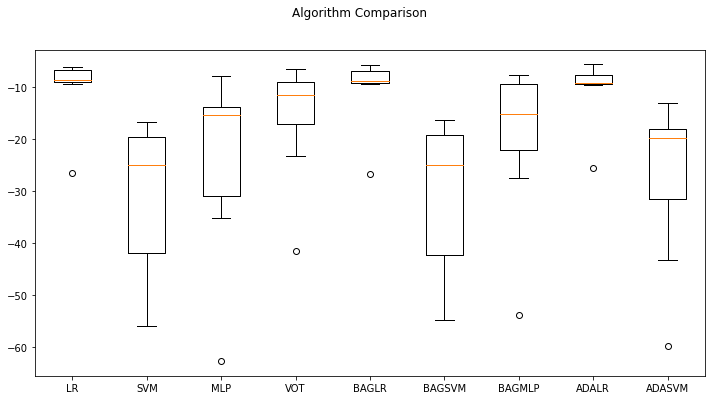

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()